Regresión Lineal - Vehicle Data Set

In [122]:
#----------------------Cargar librerias necesarias----------------------------------------

import pandas as pd #Manejo y analisis de estructura de datos
import numpy as np #Calulo numerico y analisis de datos
import seaborn as sns #Creacion de graficos estadisticos
import matplotlib.pyplot as plt #Creacion de graficos en dos dimensiones

#------------Librerias para implementar modelos de ciencias de datos----------------------

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [124]:
# Cargamos el dataset y mostramos las diez primeras lineas
data = pd.read_csv ("car details v4.csv")
data.head(5)        

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [126]:
#Visualizamos cuantos registros y dimensiones tiene el dataset
data.shape

(2059, 20)

In [128]:
#Exploracion del dataset
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [130]:
#Estadisticas del dataset
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


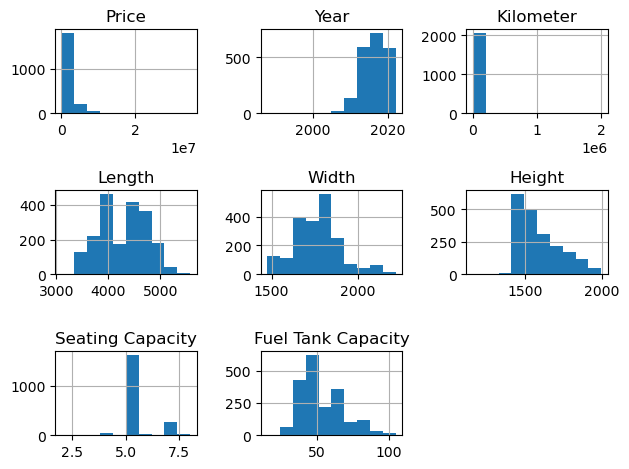

In [132]:
# Visualizamos caracteristicas y elimimanos columnas que no usaremos
data.drop(["Make","Owner", "Model"],axis=1).hist()
plt.tight_layout() 
plt.show()

In [133]:
#Eliminar columnas que no utilizaremos en el modelo
data = data.drop(["Make","Model","Color","Max Torque","Location"], axis=1)
#Limpiar columnas que contienen texto y numero
data["Engine"] = data["Engine"].str.extract("(\\d+)").astype(float)
data["Max Power"] = data["Max Power"].str.extract("(\\d+\\.?\\d*)").astype(float)
#Limpiar filas con datos nulos
data.dropna(inplace=True)
#Transformacion variables categoricas
data["Owner"] = data["Owner"].map({
    "First": 1,
    "Second": 2,
    "Third": 3,
    "4 or More": 4,
    "Test Drive Car": 0})
data_encoded = pd.get_dummies(data, drop_first=True, dtype=int)
data_encoded.head(5)

,Price,Year,Kilometer,Owner,Engine,Max Power,Length,Width,Height,Seating Capacity,...,Fuel Type_Diesel,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Transmission_Manual,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,1.0,1198.0,87.0,3990.0,1680.0,1505.0,5.0,...,0,0,0,1,0,1,1,0,1,0
1,450000,2014,75000,2.0,1248.0,74.0,3995.0,1695.0,1555.0,5.0,...,1,0,0,0,0,1,0,1,1,0
2,220000,2011,67000,1.0,1197.0,79.0,3585.0,1595.0,1550.0,5.0,...,0,0,0,1,0,1,0,1,1,0
3,799000,2019,37500,1.0,1197.0,82.0,3995.0,1745.0,1510.0,5.0,...,0,0,0,1,0,1,0,1,1,0
4,1950000,2018,69000,1.0,2393.0,148.0,4735.0,1830.0,1795.0,7.0,...,1,0,0,0,0,1,0,1,0,1


In [136]:
# Verificar si hay ALGÚN NaN en el DataFrame
print(data_encoded.isnull().values.any())

True


In [138]:
# Contar NaN por columna
print(data_encoded.isnull().sum())

Price                      0
Year                       0
Kilometer                  0
Owner                     18
Engine                     0
Max Power                  0
Length                     0
Width                      0
Height                     0
Seating Capacity           0
Fuel Tank Capacity         0
Fuel Type_CNG + CNG        0
Fuel Type_Diesel           0
Fuel Type_Hybrid           0
Fuel Type_LPG              0
Fuel Type_Petrol           0
Fuel Type_Petrol + CNG     0
Transmission_Manual        0
Seller Type_Corporate      0
Seller Type_Individual     0
Drivetrain_FWD             0
Drivetrain_RWD             0
dtype: int64


In [140]:
# Porcentaje de NaN por columna
print(data.isnull().mean() * 100)

Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Owner                 0.960512
Seller Type           0.000000
Engine                0.000000
Max Power             0.000000
Drivetrain            0.000000
Length                0.000000
Width                 0.000000
Height                0.000000
Seating Capacity      0.000000
Fuel Tank Capacity    0.000000
dtype: float64


In [142]:
#Elimina valores con NaN
data_encoded.dropna(inplace=True)  # Elimina filas con NaN

In [144]:
# Verificar si hay ALGÚN NaN en el DataFrame
print(data_encoded.isnull().values.any())

False


In [146]:
# Contar NaN por columna
print(data_encoded.isnull().sum())

Price                     0
Year                      0
Kilometer                 0
Owner                     0
Engine                    0
Max Power                 0
Length                    0
Width                     0
Height                    0
Seating Capacity          0
Fuel Tank Capacity        0
Fuel Type_CNG + CNG       0
Fuel Type_Diesel          0
Fuel Type_Hybrid          0
Fuel Type_LPG             0
Fuel Type_Petrol          0
Fuel Type_Petrol + CNG    0
Transmission_Manual       0
Seller Type_Corporate     0
Seller Type_Individual    0
Drivetrain_FWD            0
Drivetrain_RWD            0
dtype: int64


In [148]:
#Separar variable objetivo
x = data_encoded.drop("Price", axis=1)
y = data_encoded["Price"]
#Visualizamos el resultado
print("X shape:", x.shape)
print("y shape:", y.shape)
x.head()

X shape: (1856, 21)
y shape: (1856,)


,Year,Kilometer,Owner,Engine,Max Power,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Fuel Type_Diesel,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Transmission_Manual,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
0,2017,87150,1.0,1198.0,87.0,3990.0,1680.0,1505.0,5.0,35.0,...,0,0,0,1,0,1,1,0,1,0
1,2014,75000,2.0,1248.0,74.0,3995.0,1695.0,1555.0,5.0,42.0,...,1,0,0,0,0,1,0,1,1,0
2,2011,67000,1.0,1197.0,79.0,3585.0,1595.0,1550.0,5.0,35.0,...,0,0,0,1,0,1,0,1,1,0
3,2019,37500,1.0,1197.0,82.0,3995.0,1745.0,1510.0,5.0,37.0,...,0,0,0,1,0,1,0,1,1,0
4,2018,69000,1.0,2393.0,148.0,4735.0,1830.0,1795.0,7.0,55.0,...,1,0,0,0,0,1,0,1,0,1


In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [152]:
#Dividir dataset para el entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [154]:
#Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [156]:
y_pred = model.predict(X_test)

In [158]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 720062.282142731
MSE: 1419966475637.9111
R2 Score: 0.5956455929518953


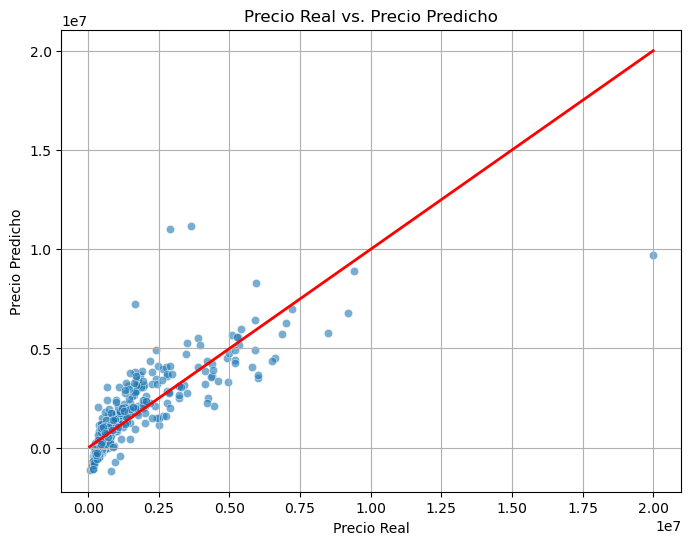

In [160]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs. Precio Predicho')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # línea ideal
plt.grid(True)
plt.show()
